Here I will be covering various concepts of time series data.This kernel is work in process and I will be updating it in coming days.If you like my kernels please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv
/kaggle/input/solar-power-generation-data/Plant_2_Generation_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv


# 1.Importing the Data and Data Exploration

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#df1 = pd.read_csv("../input/solar-power-generation-data/Plant_1_Generation_Data.csv")
df1=pd.read_csv('../input/solar-power-generation-data/Plant_1_Generation_Data.csv',parse_dates=['DATE_TIME'],index_col=0)
df2 = pd.read_csv("../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv")

In [4]:
df1.tail()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0
2020-06-17 23:45:00,4135001,zVJPv84UY57bAof,0.0,0.0,5910.000,7363272.0


In [5]:
df2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [6]:
#df1.info()

In [7]:
df1.shape

(68778, 6)

In [8]:
df1.dtypes

PLANT_ID         int64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object

### Summary of Dataset

In [9]:
print('Rows     :',df1.shape[0])
print('Columns  :',df1.shape[1])
print('\nFeatures :\n     :',df1.columns.tolist())
print('\nMissing values    :',df1.isnull().values.sum())
print('\nUnique values :  \n',df1.nunique())


Rows     : 68778
Columns  : 6

Features :
     : ['PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']

Missing values    : 0

Unique values :  
 PLANT_ID           1
SOURCE_KEY        22
DC_POWER       32909
AC_POWER       32686
DAILY_YIELD    29900
TOTAL_YIELD    37267
dtype: int64


Luckily there are no missing values

In [10]:
def add_feature(df1):
    df1['DATE_TIME']=df1.index.year
    df1['month']=df1.index.month
    df1['day']=df1.index.day
    df1['dayofweek']=df1.index.dayofweek
    df1['hour']=df1.index.hour

add_feature(df1)

In [11]:
df1.head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,month,day,dayofweek,hour
DATE_TIME,,,,,,,,,,,
2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020,5,15,4,0
2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020,5,15,4,0
2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020,5,15,4,0
2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020,5,15,4,0
2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020,5,15,4,0


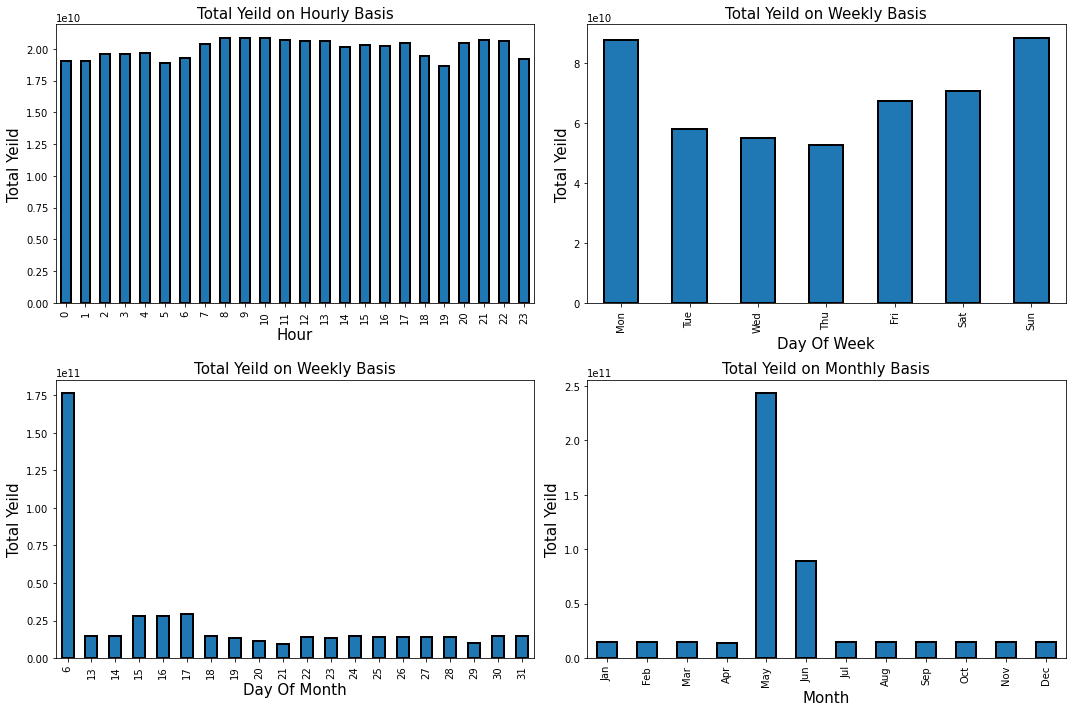

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1,)
df1.groupby('hour')['TOTAL_YIELD'].sum().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Hour',fontsize=15)
plt.ylabel('Total Yeild',fontsize=15)
plt.title('Total Yeild on Hourly Basis',fontsize=15)
#ax.tick_params(labelsize=20)
#ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
#plt.show()

plt.subplot(2,2,2,)
ax=df1.groupby('dayofweek')['TOTAL_YIELD'].sum().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Day Of Week',fontsize=15)
plt.ylabel('Total Yeild',fontsize=15)
plt.title('Total Yeild on Weekly Basis',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))

plt.subplot(2,2,3,)
df1.groupby('day')['TOTAL_YIELD'].sum().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Day Of Month',fontsize=15)
plt.ylabel('Total Yeild',fontsize=15)
plt.title('Total Yeild on Weekly Basis',fontsize=15)
#ax.set_xticklabels(('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))

plt.subplot(2,2,4,)
ax1=df1.groupby('month')['TOTAL_YIELD'].sum().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Total Yeild',fontsize=15)
plt.title('Total Yeild on Monthly Basis',fontsize=15)
ax1.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))


plt.tight_layout()
pass

From the above plots we can conclude that 

Total Yeild almost remains same throught the day

Total Yeild is more on Sunday and Monday 

Seems Power Production happens only on few days of the month with highest yeild on day 6

We can see that the yeild is more in the Month of May and June.This could be because May and Jun are summer months in India.Also the demand for power is more during summer time.